In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0,0.5,'Min and max temperature')

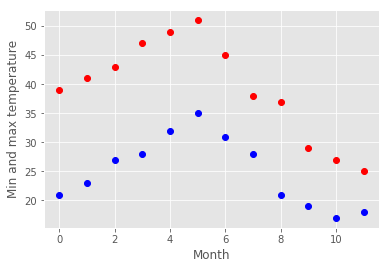

In [20]:
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [21]:
from scipy import optimize

In [22]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

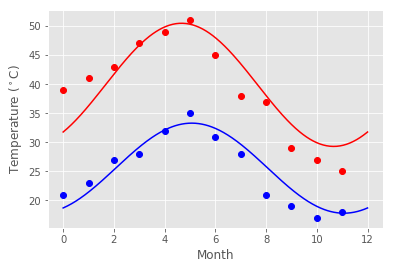

In [23]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic=pd.read_csv(url)


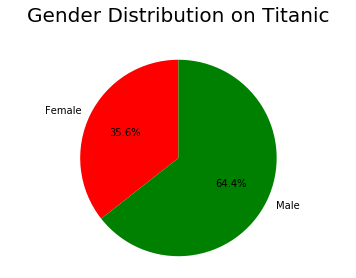

In [25]:
data=titanic.groupby(['sex'])['sex'].count()
gender_labels=['Female','Male']
def pie_chart(data, gender_labels):
    gender_fig=plt.figure()
    gender_color = ['r','g']
    chart=plt.pie(data, labels=gender_labels, colors=gender_color,autopct='%1.1f%%', startangle=90, shadow= False)
    plt.axis('equal')
    plt.title('Gender Distribution on Titanic\n',fontsize=20)
    plt.show()   
    
pie_chart(data, gender_labels)

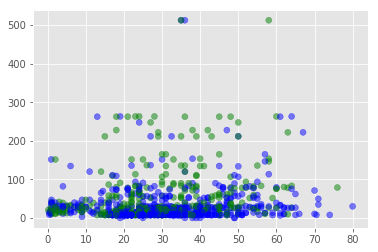

In [26]:
titanic = titanic.dropna(subset=['sex'])

mapping = {'male' : 'blue', 'female' : 'green'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapping))